<b>Table of contents</b> </br>
1. [Reading CSV](#reading_csv)
2. [Removing na and dropping useless columns](#clearing)
3. [Replacing latitude and longitude with the distance of the center of New York](#replacing_lat_long)
4. [OHE](#ohe)
5. [Splitting dataset](#splitting)
5. [Scaling](#scaling)

Датасет для предсказания стоимости жилья. Целевой столбец - price

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Reading CSV
<a id='reading_csv'></a>

In [2]:
df = pd.read_csv("D:\ML\AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Removing na and dropping useless columns
<a id='clearing'></a>

In [5]:
df = df.drop(["id", "name", "host_id", "host_name", "last_review", "neighbourhood"], axis=1)
df["reviews_per_month"].fillna("0", inplace = True)

In [6]:
df.isna().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
df.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
(df == 0).sum()

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                 10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

In [9]:
nonzero_mean_price = df[ df.price != 0 ].price.mean()
print("nonzero_mean_price ", nonzero_mean_price)
df.loc[ df.price == 0, "price" ] = nonzero_mean_price

nonzero_mean_reviews = df[ df.number_of_reviews != 0 ].number_of_reviews.mean()
print("nonzero_mean_reviews ", nonzero_mean_reviews)
df.loc[ df.number_of_reviews == 0, "number_of_reviews" ] = nonzero_mean_reviews

nonzero_mean_availability_365 = df[ df.availability_365 != 0 ].availability_365.mean()
print("nonzero_mean_availability_365 ", nonzero_mean_availability_365)
df.loc[ df.availability_365 == 0, "availability_365" ] = nonzero_mean_availability_365

(df == 0).sum()

nonzero_mean_price  152.75505277800508
nonzero_mean_reviews  29.297556831346704
nonzero_mean_availability_365  175.83199413302722


neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
df.price = np.log(df.price)

<AxesSubplot:>

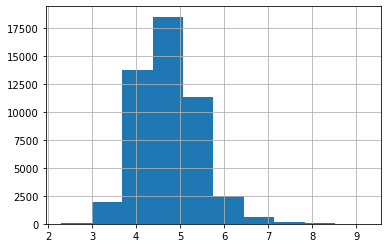

In [11]:
df.price.hist(bins=10)

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>]], dtype=object)

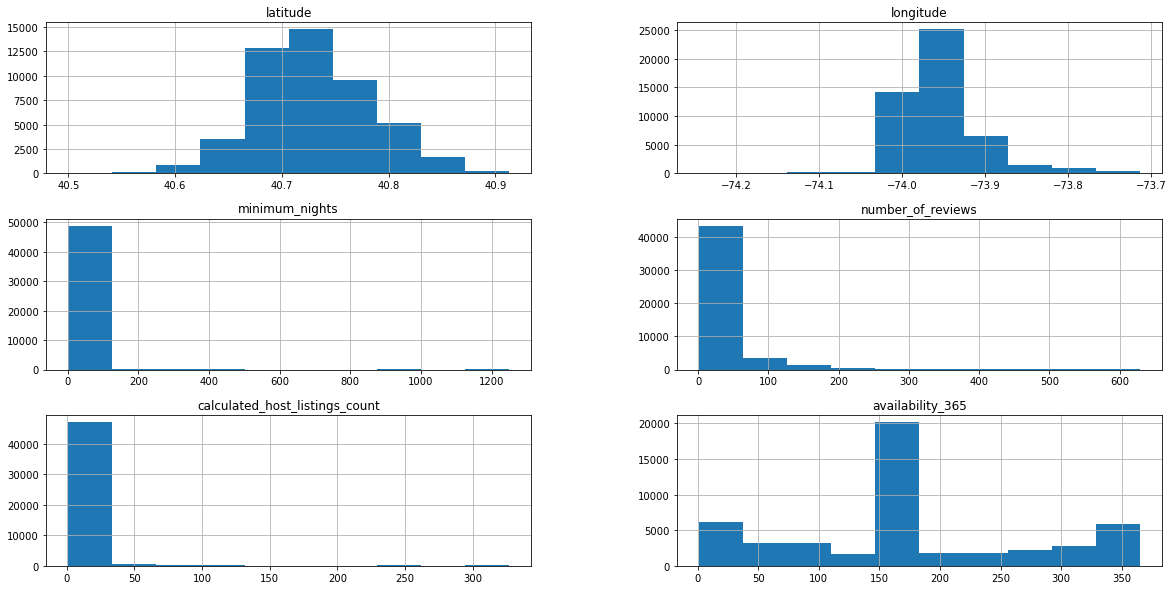

In [12]:
df.drop(columns=['price']).hist(figsize=(20, 10))

<AxesSubplot:>

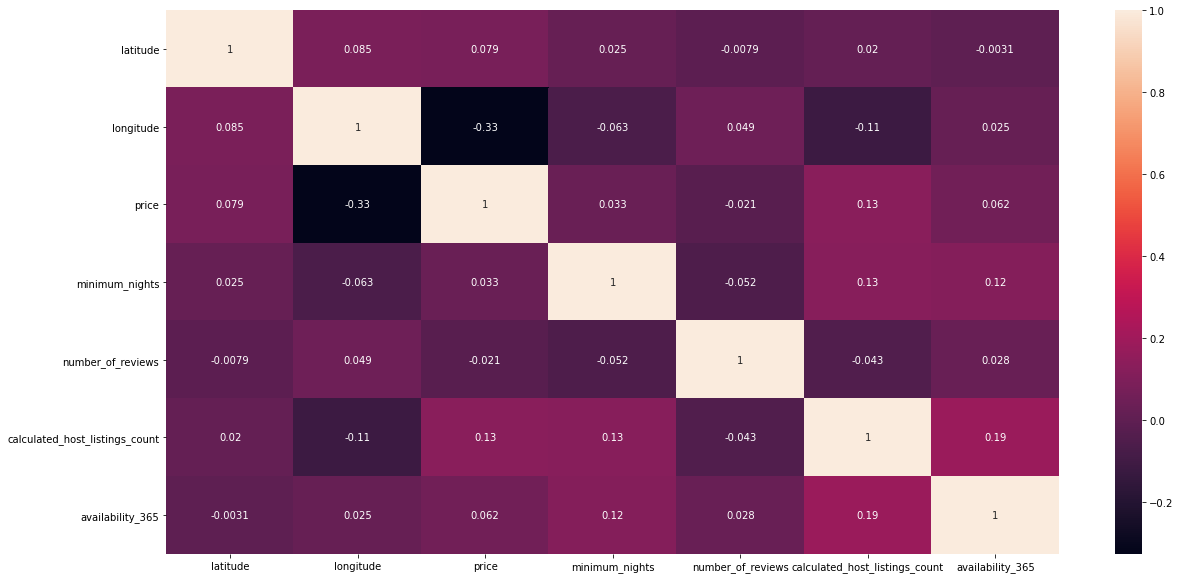

In [13]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot=True)

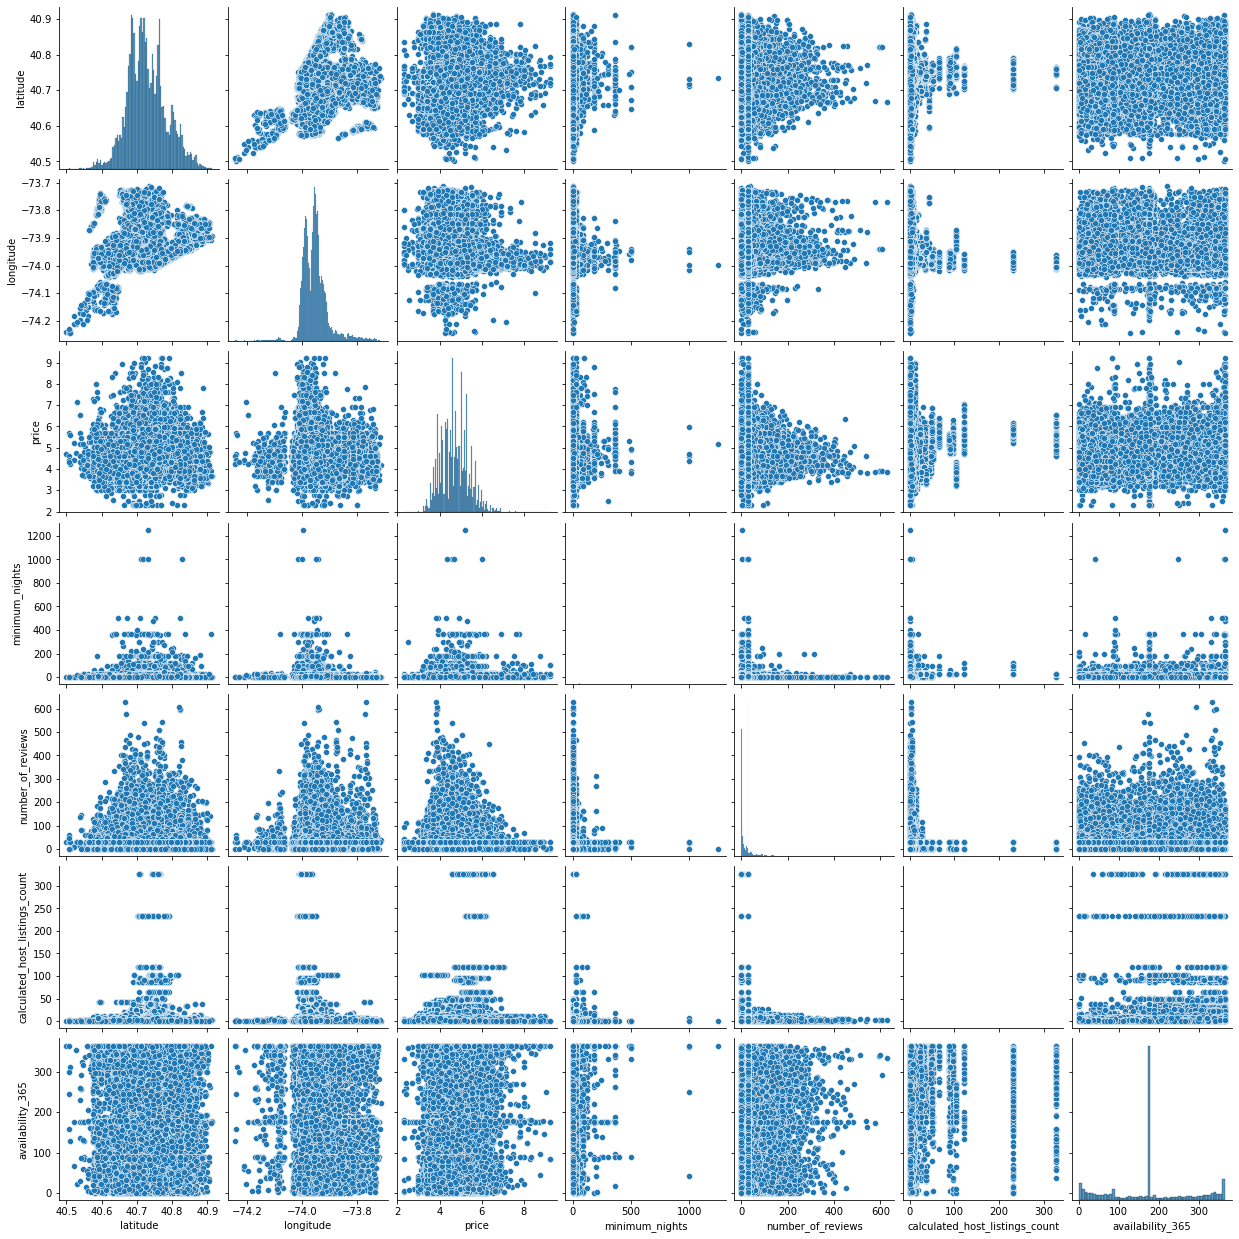

In [14]:
sns.pairplot(df)

In [15]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,5.003946,1,9.000000,0.21,6,365.000000
1,Manhattan,40.75362,-73.98377,Entire home/apt,5.416100,1,45.000000,0.38,2,355.000000
2,Manhattan,40.80902,-73.94190,Private room,5.010635,3,29.297557,0,1,365.000000
3,Brooklyn,40.68514,-73.95976,Entire home/apt,4.488636,1,270.000000,4.64,1,194.000000
4,Manhattan,40.79851,-73.94399,Entire home/apt,4.382027,10,9.000000,0.1,1,175.831994


### At the moment, the table shows latitude and longitude. I will replace these measures with the distance of the New York center

<a id='replacing_lat_long'></a>

Center of New York coordinates info: <br/>
Latitude:40.69429016264057 <br/>
Longitude:-73.93056141181815 <br/>

In [11]:
center_ny = [[40.69429016264057, -73.93056141181815]]
lat_and_log = df[['latitude', 'longitude']]

In [12]:
from sklearn.metrics.pairwise import euclidean_distances
dist = pd.DataFrame(euclidean_distances(lat_and_log, center_ny), columns=['dist_center'])
df = pd.concat([df.drop(columns=['latitude', 'longitude']), dist], axis=1)

In [13]:
df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,dist_center
0,Brooklyn,Private room,5.003946,1,9.000000,0.21,6,365.000000,0.062755
1,Manhattan,Entire home/apt,5.416100,1,45.000000,0.38,2,355.000000,0.079694
2,Manhattan,Private room,5.010635,3,29.297557,0,1,365.000000,0.115289
3,Brooklyn,Entire home/apt,4.488636,1,270.000000,4.64,1,194.000000,0.030599
4,Manhattan,Entire home/apt,4.382027,10,9.000000,0.1,1,175.831994,0.105081


## One hot encoding
<a id='ohe'></a>

<b>Categorial variable</b> -
neighbourhood_group, neighbourhood, room_type

<b>Continous variable</b> - 
latitude, longitude, price, number_of_reviews, reviews_per_month, calculated_host_listings_count	availability_365

Соответственно, над neighbourhood_group, neighbourhood, room_type нужно провести OHE

In [14]:
df_neighbourhood_group_ohe = pd.get_dummies(df['neighbourhood_group'], drop_first=True, prefix='neighbourhood_group')
#df_room_type_ohe = pd.get_dummies(df['room_type'], drop_first=True, prefix='room_type')
df_room_type_ohe = pd.get_dummies(df['room_type'], prefix='room_type')

In [15]:
df = pd.concat([df.drop(columns=['neighbourhood_group']),df_neighbourhood_group_ohe], axis=1)
df = pd.concat([df.drop(columns=['room_type']), df_room_type_ohe], axis=1)
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,dist_center,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,5.003946,1,9.000000,0.21,6,365.000000,0.062755,1,0,0,0,0,1,0
1,5.416100,1,45.000000,0.38,2,355.000000,0.079694,0,1,0,0,1,0,0
2,5.010635,3,29.297557,0,1,365.000000,0.115289,0,1,0,0,0,1,0
3,4.488636,1,270.000000,4.64,1,194.000000,0.030599,1,0,0,0,1,0,0
4,4.382027,10,9.000000,0.1,1,175.831994,0.105081,0,1,0,0,1,0,0


In [16]:
df.isna().sum()

price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dist_center                          0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Entire home/apt            0
room_type_Private room               0
room_type_Shared room                0
dtype: int64

## Splitting dataset
<a id='splitting'></a>

In [17]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3)

## Scaling variables
<a id='scaling'></a>

In [18]:
list_cont = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "dist_center"]

In [19]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

standardScaler.fit(df_train[ list_cont ])

StandardScaler()

In [20]:
df_train_scaled = standardScaler.transform(df_train[list_cont])
df_test_scaled = standardScaler.transform(df_test[list_cont])

In [22]:
df_train_scaled

array([[ 1.11207225, -0.65587444, -0.65196948, -0.18654799, -1.28866307,
        -1.40391338],
       [-0.24647663, -0.56326955, -0.4662065 , -0.18654799, -1.58474484,
        -0.20103753],
       [-0.24647663,  0.03866225,  0.03535355, -0.12698837, -0.00564207,
        -1.02794119],
       ...,
       [-0.19795703, -0.33175732,  0.64217928, -0.12698837, -1.72291633,
         0.22849342],
       [-0.29499624, -0.12339631,  1.34807861, -0.18654799,  1.12933805,
         0.07574389],
       [-0.19795703,  0.01551103, -0.19994623, -0.15676818, -1.55513666,
         0.33352968]])

In [26]:
df_train[list_cont] = df_train_scaled
df_test[list_cont] = df_test_scaled

<ipython-input-26-be7431974e74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[list_cont] = df_train_scaled
C:\Users\ovesgur\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-26-be7431974e74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [21]:
df_train

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,dist_center,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
22777,4.532599,30,1.000000,0.04,1,45.000000,0.011911,1,0,0,0,1,0,0
30995,5.164786,2,5.000000,0.34,1,15.000000,0.062371,0,1,0,0,1,0,0
21562,5.129899,2,31.000000,1.15,3,175.000000,0.027683,1,0,0,0,1,0,0
16057,5.075174,6,2.000000,0.05,1,175.831994,0.072664,0,1,0,0,1,0,0
19536,5.342334,2,157.000000,4.8,1,16.000000,0.079144,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23951,4.499810,5,29.297557,0,1,175.831994,0.182000,0,1,0,0,1,0,0
17000,4.382027,2,15.000000,0.41,1,175.831994,0.108202,0,1,0,0,0,1,0
38213,4.442651,3,15.000000,2.13,3,1.000000,0.080390,0,1,0,0,0,1,0
37538,5.298317,1,24.000000,3.27,1,290.000000,0.073982,1,0,0,0,1,0,0


In [27]:
df_train.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,dist_center,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
27835,5.298317,-0.282848,0.000257,-0.691796,-0.188901,-0.002795,-1.004664,1,0,0,0,1,0,0
47867,4.828314,-0.236465,-0.636202,0.578773,-0.188901,-1.650986,-0.167055,1,0,0,0,1,0,0
9812,5.347108,-0.236465,3.817081,1.931929,-0.188901,-0.070291,0.184890,0,1,0,0,1,0,0
11658,5.247024,-0.282848,-0.636202,-0.660032,-0.188901,-0.002795,-0.136164,0,1,0,0,1,0,0
26211,5.298317,-0.282848,-0.286468,-0.202627,-0.158784,-0.880397,-1.097292,1,0,0,0,1,0,0


In [28]:
print(df_train.shape)
print(df_test.shape)

(34226, 14)
(14669, 14)


In [29]:
y_train = df_train.price
y_test = df_test.price

x_train = df_train.drop('price', axis=1)
x_test = df_test.drop('price', axis=1)

In [30]:
y_mean = np.mean(y_train)
y_pred_naive = np.ones(len(y_test)) * y_mean

In [31]:
from sklearn import metrics

In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [33]:
print_metrics(y_test, y_pred_naive)

MAE: 83.82313786001669
RMSE: 229.9829147950363
R2: -8.971561986026444e-05
MAPE: 11.975194718974366


In [66]:
from sklearn.linear_model import LinearRegression

model_regression = LinearRegression()

model_regression.fit(x_train, y_train)
y_pred_regr = model_regression.predict(x_test)

In [67]:
print_metrics(y_test,y_pred_regr)

MAE: 64.27601518133373
RMSE: 217.51264165991807
R2: 0.4624833813740973
MAPE: 7.863241553557622


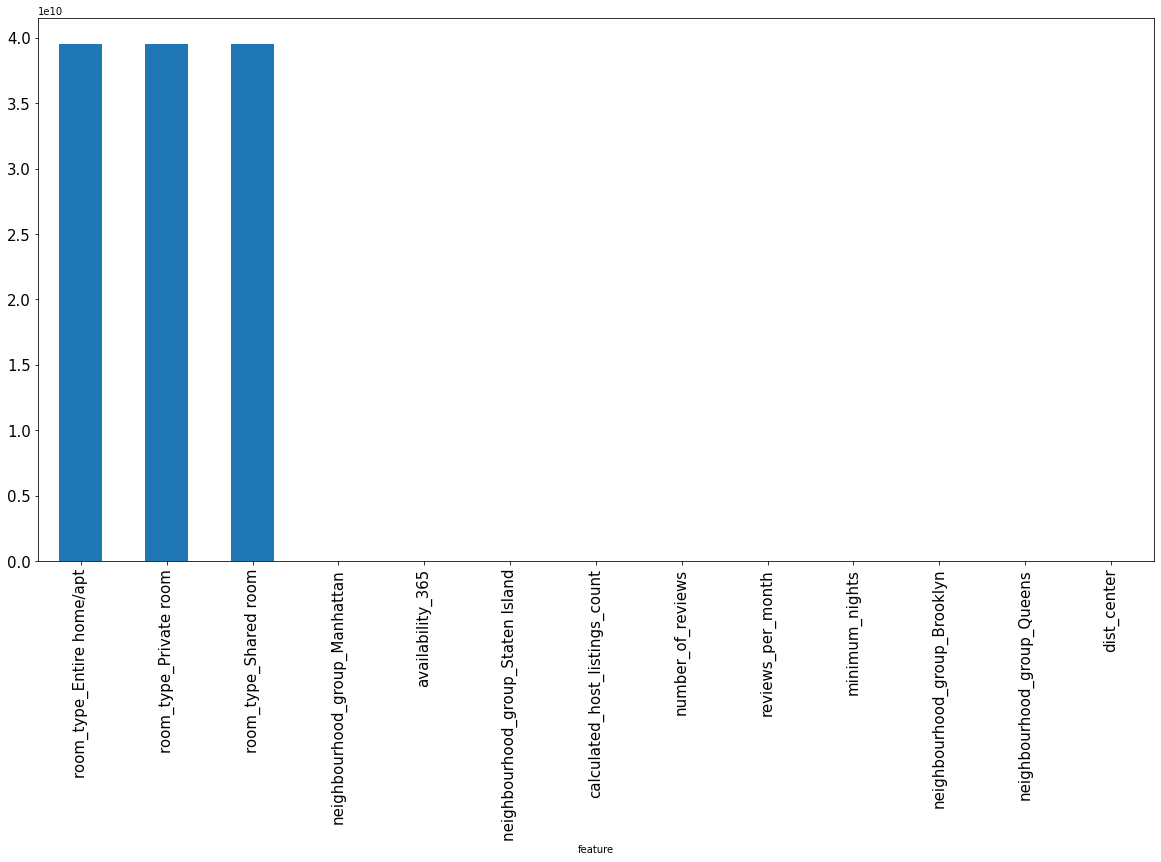

In [68]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(20, 10), fontsize=15);

In [37]:
from sklearn.linear_model import Lasso

# Объявили модель
model_simplelasso = Lasso()

# Обучили модель на тренировочной выборке 
model_simplelasso.fit(x_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_lasso = model_simplelasso.predict(x_test)

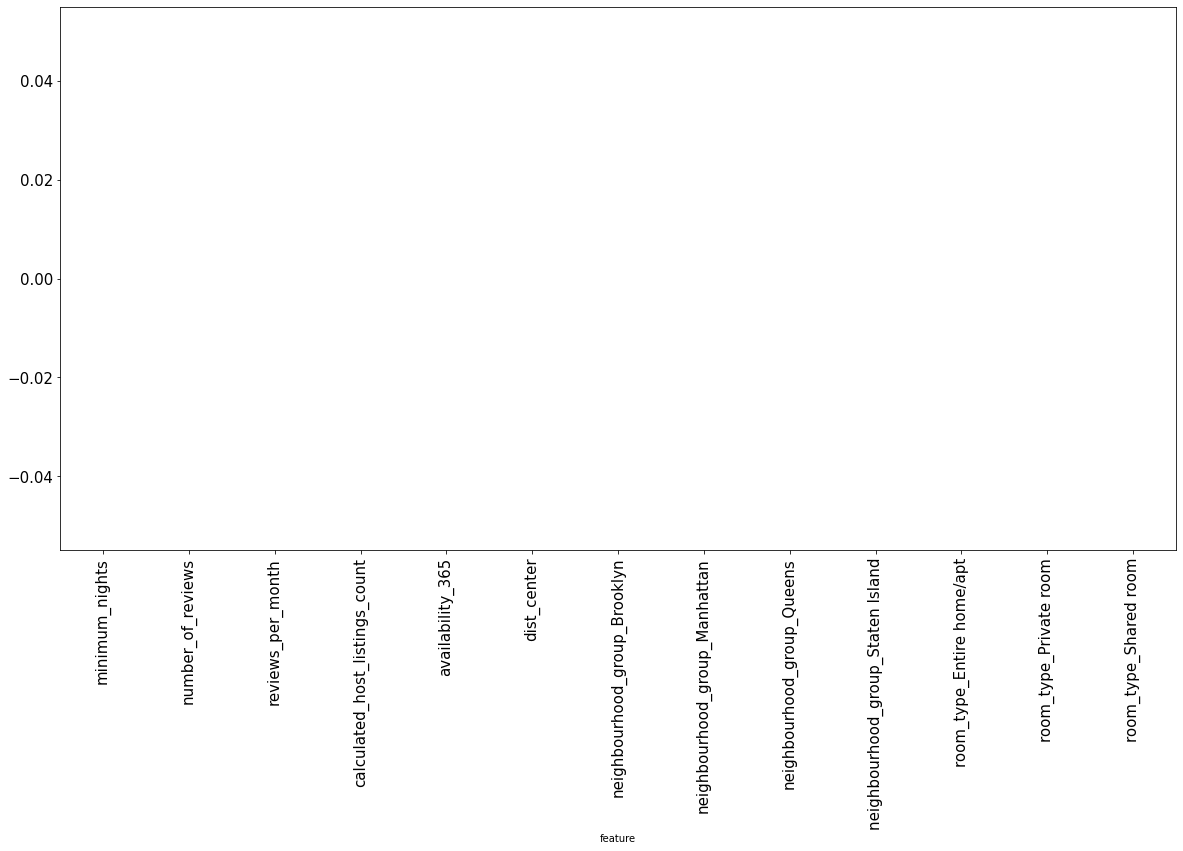

In [38]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": model_simplelasso.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(20,10), fontsize=15);

In [54]:
print_metrics(y_test,y_pred_lasso)

MAE: 83.82313786001713
RMSE: 229.982914795035
R2: -8.97156198620408e-05
MAPE: 11.975194718974619


In [55]:
from sklearn.model_selection import GridSearchCV 

grid = {'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01, 0.05, 0.1]}
model_lasso = Lasso()

grid_cv_lasso = GridSearchCV(model_lasso, grid, cv=5)
grid_cv_lasso.fit(x_train, y_train)


print(grid_cv_lasso.best_params_)

{'alpha': 0.0001}


<AxesSubplot:xlabel='feature'>

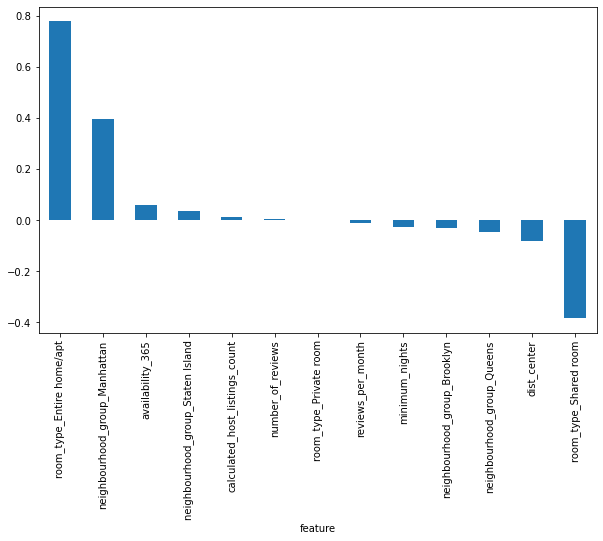

In [56]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6))

In [58]:
from sklearn.linear_model import Lasso

y_pred_lasso = grid_cv_lasso.predict(x_test)

print_metrics(y_test,y_pred_lasso)

MAE: 64.2743628858149
RMSE: 217.51817523024508
R2: 0.462491124320491
MAPE: 7.863371351322508


<AxesSubplot:xlabel='feature'>

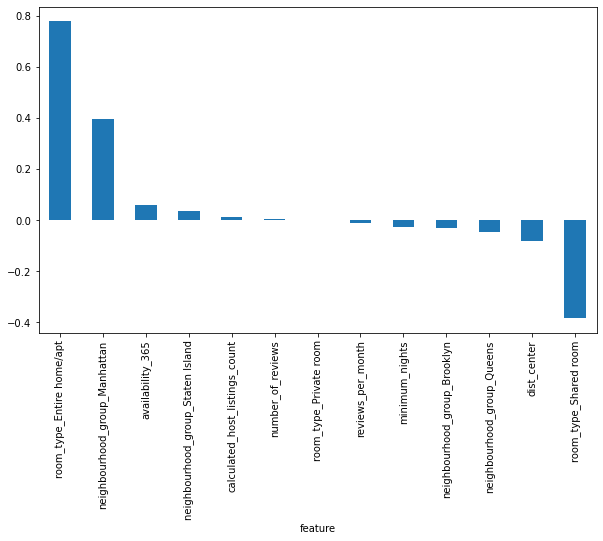

In [59]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6))

In [61]:
from sklearn.linear_model import LassoCV

lassoCV = LassoCV()
lassoCV.fit(x_train, y_train)

y_pred_lasso_cv = lassoCV.predict(x_test)
print(lassoCV.alpha_)

0.0002153999497003477


In [64]:
print_metrics(y_test, y_pred_lasso_cv)

MAE: 64.27254855137913
RMSE: 217.52535473350974
R2: 0.462487855667311
MAPE: 7.863681825828743
